<a href="https://colab.research.google.com/github/Saul-Ochoa/Python-UTEC/blob/main/Tarea3_Modulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Tarea 3 - Módulo 3: PROGRAMA DE ESPECIALIZACIÓN EN PROGRAMACIÓN PYTHON 2023-I**




* Autor : Saúl kevin Ochoa Salazar

In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp

Grafica las siguientes funciones

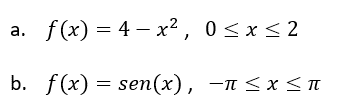

## **Preguna A**

$f(x) = 4 - x^2, \quad 0 \leq x \leq 2$


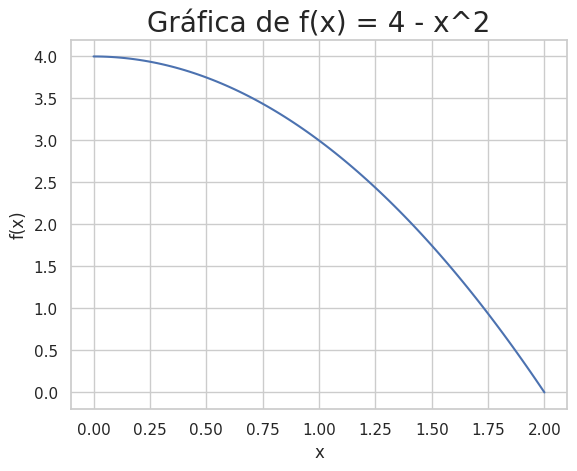

In [488]:
def f(x):
  return 4 - x**2
x=np.linspace(0,2,100)
y=f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) = 4 - x^2',fontsize=20)
plt.grid(True)
plt.show()

In [489]:
fig=px.line(x=x,y=y)
fig.update_layout(
    title='Gráfica de f(x) = 4 - x^2',
    xaxis_title='x',
    yaxis_title='f(x)',
    showlegend=False,
    template='plotly_white'
)
fig.show()

## **Pregunta b**

$f(x) = \sin(x), \quad -\pi \leq x \leq \pi$

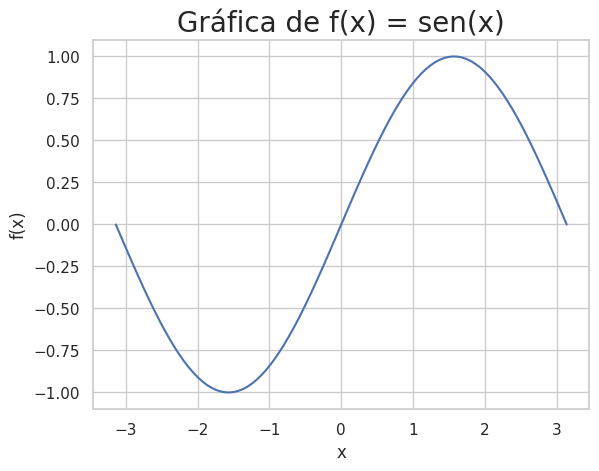

In [490]:
def f(x):
  return np.sin(x)
x=np.linspace(-np.pi,np.pi,100)
y=f(x)
plt.plot(x, y)
plt.title('Gráfica de f(x) = sen(x)',fontsize=20)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [491]:
fig = px.line(x=x, y=y)
fig.update_xaxes(title='x')
fig.update_yaxes(title='f(x)')
fig.update_layout(title='Gráfico de f(x) = sin(x)',
                  template='plotly_white')
fig.show()

## **Pregunta 2**

El archivo Tarea-data.xlsx contiene la información de residuos sólidos en kilogramos por día recolectado por las Municipalidades de Lima durante los años 2014-2017.

En este archivo de datos se tiene las siguientes variables:

* Población: número de habitantes del distrito
* Residuos: cantidad diaria recolectada en kilogramos por el distrito

Se solicita que elabore tres gráficos estadísticos referente a los datos presentados y un breve comentario de cada gráfico.

In [492]:
url='https://github.com/Saul-Ochoa/Python-UTEC/raw/main/Tarea-data.xlsx'

In [493]:
df=pd.read_excel(url)
df.head()

,Año,Distrito,Poblacion,Residuos
0,2014,LIMA,276857,230065.0
1,2014,ANCON,38482,10319.0
2,2014,ATE,611082,182500.0
3,2014,BARRANCO,30641,19999.0
4,2014,BREÑA,77116,36978.0


In [494]:
df.sample(10)

,Año,Distrito,Poblacion,Residuos
115,2016,SAN BORJA,112317,31156.74
34,2014,SAN MARTIN DE PORRES,686702,161773.00
98,2016,JESUS MARIA,71634,25025.85
20,2014,MAGDALENA VIEJA,76437,32501.00
23,2014,PUCUSANA,16120,4547.00
41,2014,VILLA EL SALVADOR,454114,110918.00
45,2015,ATE,630086,216839.60
156,2017,RIMAC,162897,46716.53
42,2014,VILLA MARIA DEL TRIUNFO,441239,94100.00
29,2014,SAN BORJA,111808,35179.00


In [495]:
df.shape

(172, 4)

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        172 non-null    int64  
 1   Distrito   172 non-null    object 
 2   Poblacion  172 non-null    int64  
 3   Residuos   172 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.5+ KB


In [497]:
df.describe()

,Año,Poblacion,Residuos
count,172.000000,1.720000e+02,172.000000
mean,2015.500000,2.084246e+05,66518.191105
std,1.121298,2.254196e+05,68634.229461
min,2014.000000,1.467000e+03,329.140000
25%,2014.750000,5.091500e+04,15008.182500
50%,2015.500000,1.314545e+05,42549.580000
75%,2016.250000,3.229362e+05,98637.410000
max,2017.000000,1.138453e+06,352017.800000


### **Grafico 1**

In [498]:
tabla_1=df.groupby(['Año','Poblacion'])['Distrito'].sum()
tabla_1=pd.DataFrame(tabla_1).reset_index()
tabla_1=tabla_1.sort_values(['Año', 'Poblacion'],ascending=[True,False])
tabla_1.head()

,Año,Poblacion,Distrito
42,2014,1069566,SAN JUAN DE LURIGANCHO
41,2014,686702,SAN MARTIN DE PORRES
40,2014,611082,ATE
39,2014,522760,COMAS
38,2014,454114,VILLA EL SALVADOR


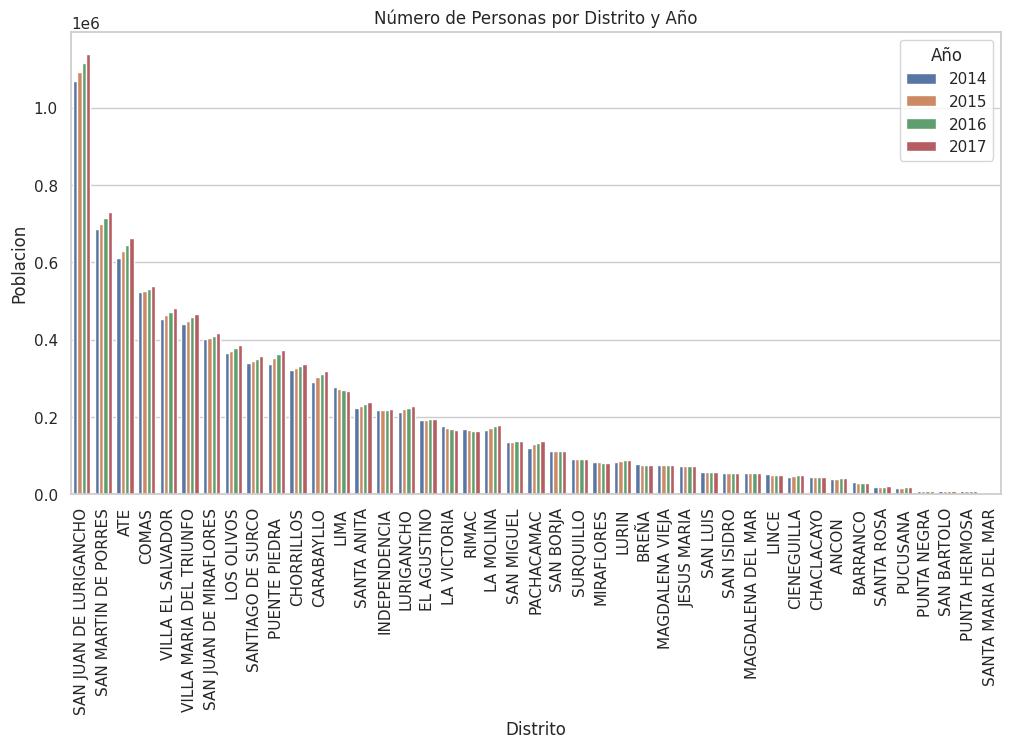

In [499]:
# Crear el gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=tabla_1, x='Distrito', y='Poblacion', hue='Año')
plt.xticks(rotation='vertical')
plt.title('Número de Personas por Distrito y Año')
plt.show()

In [500]:
fig = px.bar(tabla_1, x='Distrito', y='Poblacion', color='Año',title='Numero de Personas por Distrito')
fig.show()


En el primer grafico de barras se muestra que la mayor cantidad de personas por distritos desde el año 2014 hasta al 2017 son de San Juan de Lurigancho y la menor cantidad de personas por distrito pertene a Santa Maria del Mar, Punta hermos en resumen son los balnearios de Lima.

In [501]:
tabla_2=df.groupby(['Año','Residuos'])['Distrito'].sum()
tabla_2=pd.DataFrame(tabla_2).reset_index()
tabla_2=tabla_2.sort_values(['Año', 'Residuos'],ascending=[True,False])
tabla_2.head()

,Año,Residuos,Distrito
42,2014,259820.0,SAN JUAN DE LURIGANCHO
41,2014,230065.0,LIMA
40,2014,182500.0,ATE
39,2014,161773.0,SAN MARTIN DE PORRES
38,2014,157763.0,COMAS


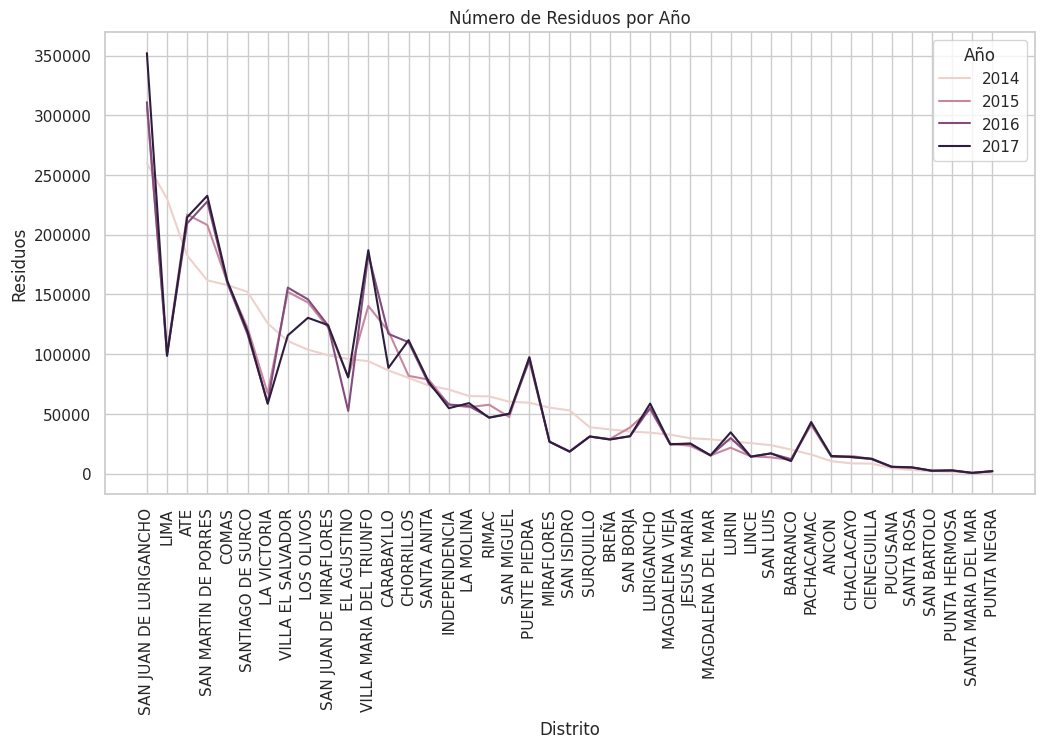

In [502]:
plt.figure(figsize=(12,6))
sns.lineplot(data=tabla_2, x='Distrito', y='Residuos', hue='Año')
plt.xticks(rotation='vertical')
plt.title('Número de Residuos por Año')
plt.show()

In [503]:
year=[2014,2015,2016,2017]
tablas_por_año={}
for y in year:
    nombre_tabla = f"datos_{y}"
    datos_año_actual = tabla_2.loc[tabla_2['Año'] == y]
    tablas_por_año[nombre_tabla] = datos_año_actual
for nombre, tabla in tablas_por_año.items():
    print(nombre)
    print(tabla)
    print()

datos_2014
     Año  Residuos                 Distrito
42  2014  259820.0   SAN JUAN DE LURIGANCHO
41  2014  230065.0                     LIMA
40  2014  182500.0                      ATE
39  2014  161773.0     SAN MARTIN DE PORRES
38  2014  157763.0                    COMAS
37  2014  152107.0        SANTIAGO DE SURCO
36  2014  125742.0              LA VICTORIA
35  2014  110918.0        VILLA EL SALVADOR
34  2014  103730.0               LOS OLIVOS
33  2014   99044.0   SAN JUAN DE MIRAFLORES
32  2014   95933.0              EL AGUSTINO
31  2014   94100.0  VILLA MARIA DEL TRIUNFO
30  2014   86284.0               CARABAYLLO
29  2014   80086.0               CHORRILLOS
28  2014   73651.0              SANTA ANITA
27  2014   70344.0            INDEPENDENCIA
26  2014   64883.0                LA MOLINA
25  2014   64620.0                    RIMAC
24  2014   60164.0               SAN MIGUEL
23  2014   59276.0          PUENTE PIEDRA  
22  2014   55151.0               MIRAFLORES
21  2014   52859.0   

In [504]:
nombres_tablas = list(tablas_por_año.keys())
print(nombres_tablas)

['datos_2014', 'datos_2015', 'datos_2016', 'datos_2017']


**Plotly Express**

In [505]:
for i in nombres_tablas:
  fig=px.line(tablas_por_año[i], x='Distrito', y='Residuos', color='Año',template='plotly_dark')
  fig.update_xaxes(tickangle=90)
  fig.update_layout(title=f"Número de Residuos por {i}")
  fig.show()

* En el grafico de linea se muestra que la mayor cantidad de residuos diaria recolectada en kilogramos por distritos desde el año 2014 hasta al 2017 son de San Juan de Lurigancho.

* La menor cantidad de residuos diaria recolectada en kilogramos por distritos le pertence a los balnearios especificamente a Santa Maria del mar, punta negra, san bartolo y entre otros.

**Conclusiones**

* Tal como se evindecia en las graficos presentados en la seccion 1, San juan lurigancho ocupa el primer lugar del numero de personas y residuos. Por otra parte los balnearios de lima son los distritos con menos personas y residuos

### **Grafico 2**

**Realizar un analisis sobre la cantidad de personas y residuso por distritos en porcentaje durante el año**

In [506]:
suma_poblacion_por_año = df.groupby('Año')['Poblacion'].sum()
suma_poblacion_por_año

Año
2014    8751741
2015    8890792
2016    9031640
2017    9174855
Name: Poblacion, dtype: int64

In [507]:
suma_residuos_año=df.groupby('Año')['Residuos'].sum()
suma_residuos_año

Año
2014    2828128.00
2015    2836989.95
2016    2880047.10
2017    2895963.82
Name: Residuos, dtype: float64

In [508]:
df['Porcentaje']=df['Poblacion']/ df['Año'].map(suma_poblacion_por_año)*100
df['Porcentaje_residuo']=df['Residuos']/df['Año'].map(suma_residuos_año)*100
df.head()

,Año,Distrito,Poblacion,Residuos,Porcentaje,Porcentaje_residuo
0,2014,LIMA,276857,230065.0,3.163451,8.134886
1,2014,ANCON,38482,10319.0,0.439707,0.364870
2,2014,ATE,611082,182500.0,6.982405,6.453032
3,2014,BARRANCO,30641,19999.0,0.350113,0.707146
4,2014,BREÑA,77116,36978.0,0.881150,1.307508


In [509]:
df.tail()

,Año,Distrito,Poblacion,Residuos,Porcentaje,Porcentaje_residuo
167,2017,SANTA ROSA,19802,5162.66,0.215829,0.178271
168,2017,SANTIAGO DE SURCO,357577,118955.65,3.897359,4.107636
169,2017,SURQUILLO,91474,31003.15,0.997008,1.070564
170,2017,VILLA EL SALVADOR,482027,115617.62,5.253783,3.992371
171,2017,VILLA MARIA DEL TRIUNFO,465735,186992.60,5.076211,6.457007


In [510]:
datos_2014 = df[df['Año'] == 2014]
datos_2014=datos_2014.sort_values(by='Porcentaje', ascending=False)
datos_2015 = df[df['Año'] == 2015]
datos_2015=datos_2015.sort_values(by='Porcentaje', ascending=False)
datos_2016 = df[df['Año'] == 2016]
datos_2016=datos_2016.sort_values(by='Porcentaje', ascending=False)
datos_2017 = df[df['Año'] == 2017]
datos_2017=datos_2017.sort_values(by='Porcentaje', ascending=False)

In [511]:
tabla_2014_personas = datos_2014.nlargest(10, 'Porcentaje')
tabla_2015_personas = datos_2015.nlargest(10, 'Porcentaje')
tabla_2016_personas= datos_2016.nlargest(10, 'Porcentaje')
tabla_2017_personas= datos_2017.nlargest(10, 'Porcentaje')

In [512]:
tabla_2014_residuos = datos_2014.nlargest(10, 'Residuos')
tabla_2015_residuos = datos_2015.nlargest(10, 'Residuos')
tabla_2016_residuos= datos_2016.nlargest(10, 'Residuos')
tabla_2017_residuos= datos_2017.nlargest(10, 'Residuos')

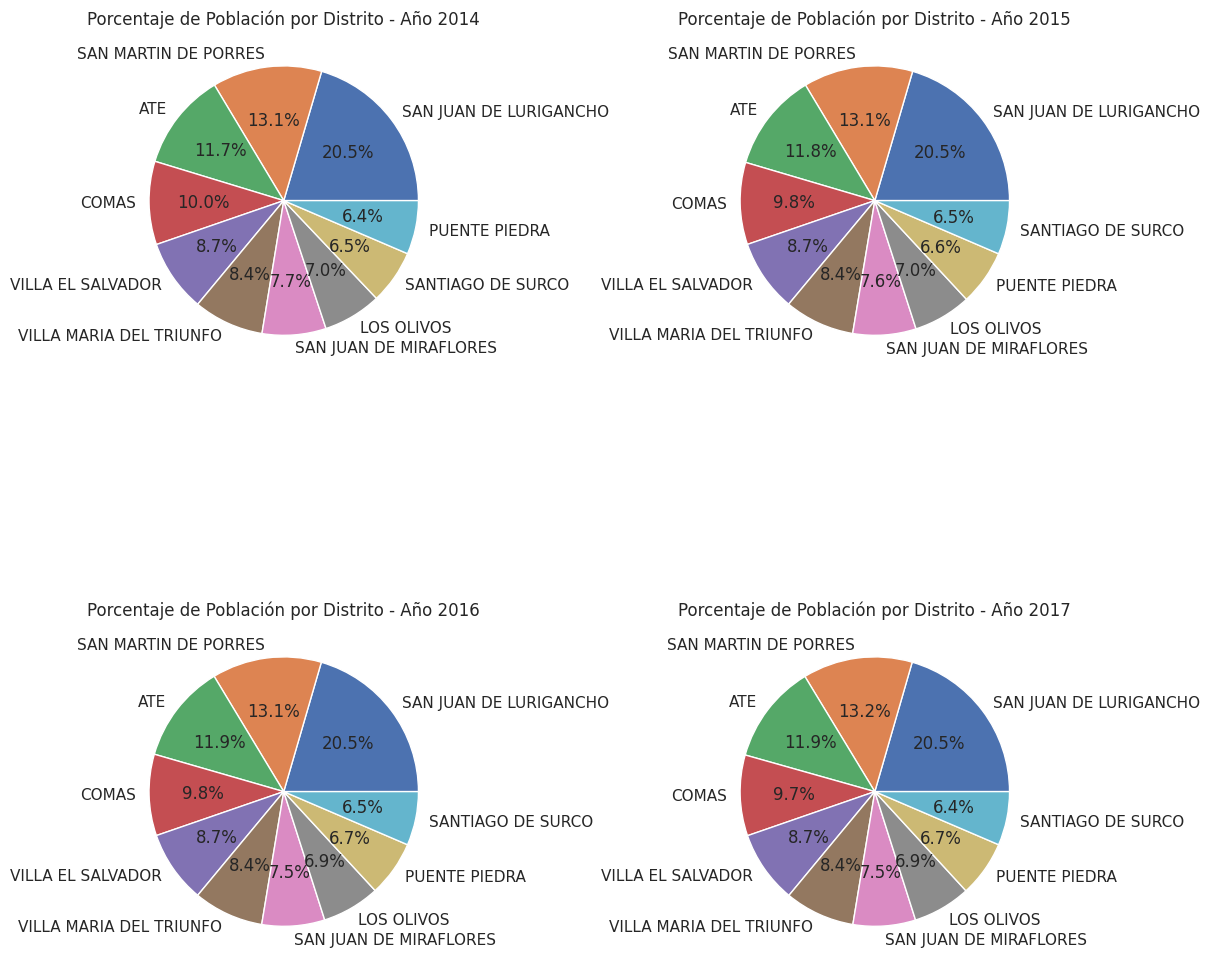

In [513]:
lista_años = ['tabla_2014_personas', 'tabla_2015_personas', 'tabla_2016_personas', 'tabla_2017_personas']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for i, dato in enumerate(lista_años):
    tabla = globals()[dato]
    subplot_ax = ax[i // 2, i % 2]
    subplot_ax.pie(tabla['Porcentaje'], labels=tabla['Distrito'], autopct='%1.1f%%')
    subplot_ax.set_title(f"Porcentaje de Población por Distrito - Año {dato.split('_')[1]}")
plt.tight_layout()
plt.show()

* **Tal como se evidencia en la siguiente figura del porcentaje de poblacion de los 10 distritos con mas habitante por año le pertenece a San Juan de Lurigancho abarca el 20.5 % en los 4 años.**

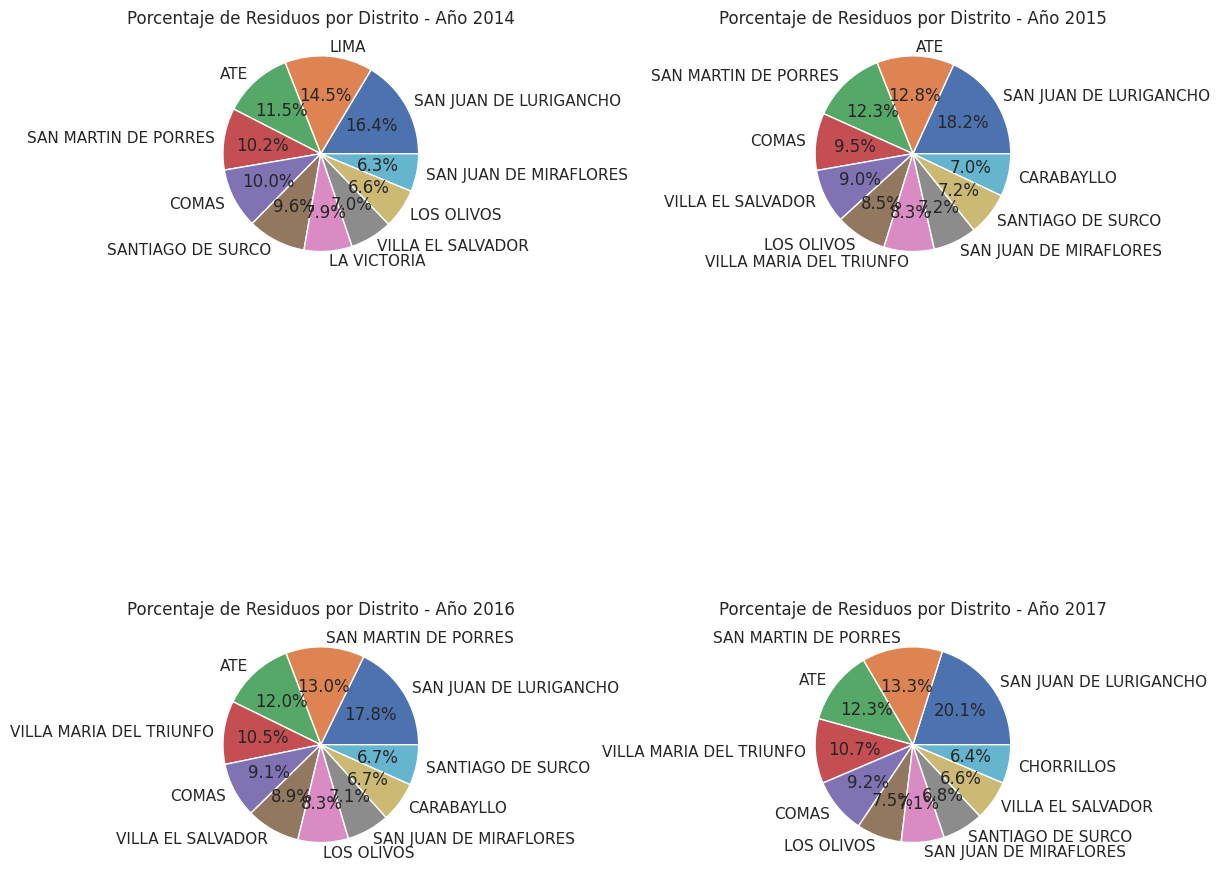

In [514]:
lista_años = ['tabla_2014_residuos', 'tabla_2015_residuos', 'tabla_2016_residuos', 'tabla_2017_residuos']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for i, dato in enumerate(lista_años):
    tabla = globals()[dato]
    subplot_ax = ax[i // 2, i % 2]
    subplot_ax.pie(tabla['Residuos'], labels=tabla['Distrito'], autopct='%1.1f%%')
    subplot_ax.set_title(f"Porcentaje de Residuos por Distrito - Año {dato.split('_')[1]}")
plt.tight_layout()
plt.show()

* **Tal como se evidencia en la siguiente figura del porcentaje de residuos de los 10 distritos con mas residuos por año le pertenece a San Juan de Lurigancho y al largo del tiempo fue aumentando desde el 16.4% hasta 20.1%**

**Conclusiones del grafico 2**

* Se puede concluir que San juan de lurigancho es el distrito de lima con mas personas y residuos durante los  4 años. Este incremento porcentual se pueden evidenciar en las graficas circulares y de lineas.

### **Grafico 3**

In [515]:
df.head()

,Año,Distrito,Poblacion,Residuos,Porcentaje,Porcentaje_residuo
0,2014,LIMA,276857,230065.0,3.163451,8.134886
1,2014,ANCON,38482,10319.0,0.439707,0.364870
2,2014,ATE,611082,182500.0,6.982405,6.453032
3,2014,BARRANCO,30641,19999.0,0.350113,0.707146
4,2014,BREÑA,77116,36978.0,0.881150,1.307508


In [516]:
df_1=df.iloc[:,:4]
df_1.head()

,Año,Distrito,Poblacion,Residuos
0,2014,LIMA,276857,230065.0
1,2014,ANCON,38482,10319.0
2,2014,ATE,611082,182500.0
3,2014,BARRANCO,30641,19999.0
4,2014,BREÑA,77116,36978.0


**Correlacion entre las variables Poblacion y Residuos**

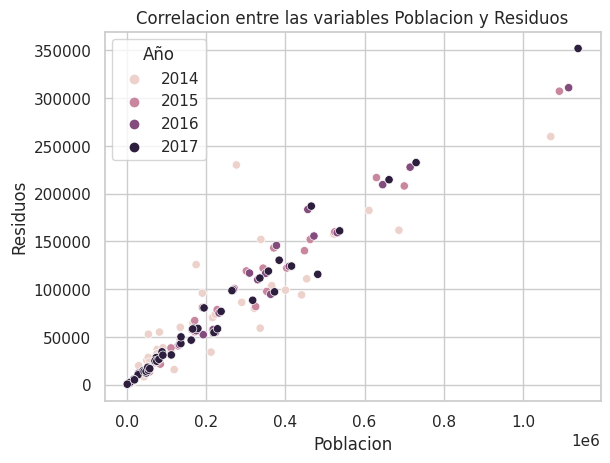

In [517]:
sns.scatterplot(data=df_1, x="Poblacion", y="Residuos",hue='Año')
plt.title('Correlacion entre las variables Poblacion y Residuos')
plt.show()

<ipython-input-518-c98697aea4b0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



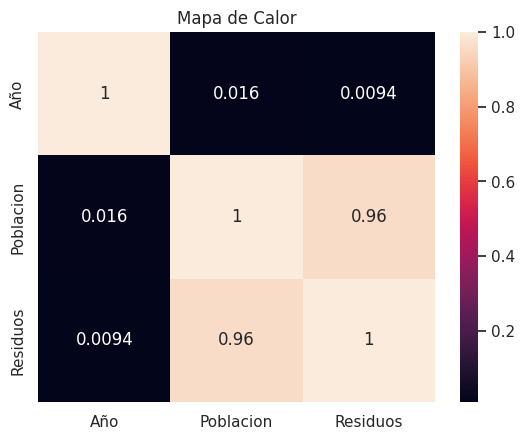

In [518]:
sns.heatmap(df_1.corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

* Tal como se evidencia existe una correlacion fuerte entre el numero de poblacion y residuos de 0.96.

* Este nos quiere decir que caundo aumente el numero de la poblacion tambien va aumentar el número de residuos.

In [519]:
tabla_año=df.groupby('Año')['Residuos','Poblacion'].sum()
tabla_año

<ipython-input-519-fb3cba4e983e>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Residuos,Poblacion
Año,,
2014,2828128.00,8751741
2015,2836989.95,8890792
2016,2880047.10,9031640
2017,2895963.82,9174855


In [520]:
tabla_año['% Residuos'] = tabla_año['Residuos'].pct_change() * 100
tabla_año['% Poblacion'] = tabla_año['Poblacion'].pct_change() * 100
tabla_año.head()

,Residuos,Poblacion,% Residuos,% Poblacion
Año,,,,
2014,2828128.00,8751741,NaN,NaN
2015,2836989.95,8890792,0.313350,1.588838
2016,2880047.10,9031640,1.517705,1.584201
2017,2895963.82,9174855,0.552655,1.585703


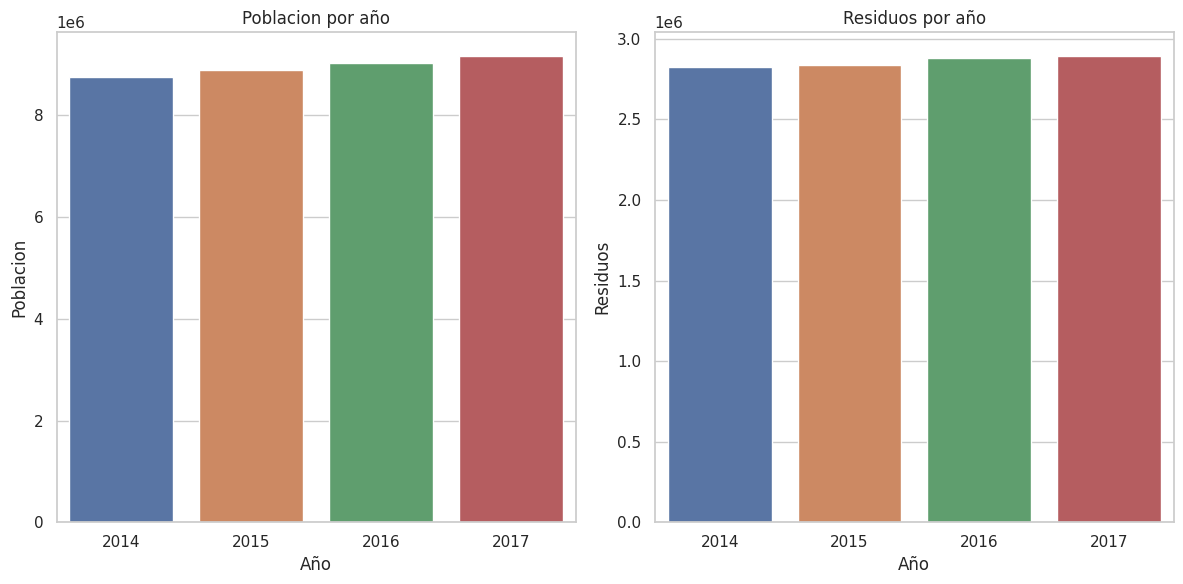

In [524]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.barplot(data=tabla_año, y="Poblacion", x=tabla_año.index, ax=axs[0])
axs[0].set_title("Poblacion por año")
sns.barplot(data=tabla_año, y="Residuos", x=tabla_año.index, ax=axs[1])
axs[1].set_title("Residuos por año")
plt.tight_layout()
plt.show()

In [523]:
fig1 = go.Bar(x=tabla_año.index, y=tabla_año['Poblacion'], name="Poblacion")
fig2 = go.Bar(x=tabla_año.index, y=tabla_año['Residuos'], name="Residuos")
fig = make_subplots(rows=1, cols=2, subplot_titles=("Poblacion por año", "Residuos por año"))
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)
fig.update_layout(height=600, width=800, title_text="Gráficos de Poblacion y Residuos por año")
fig.show()

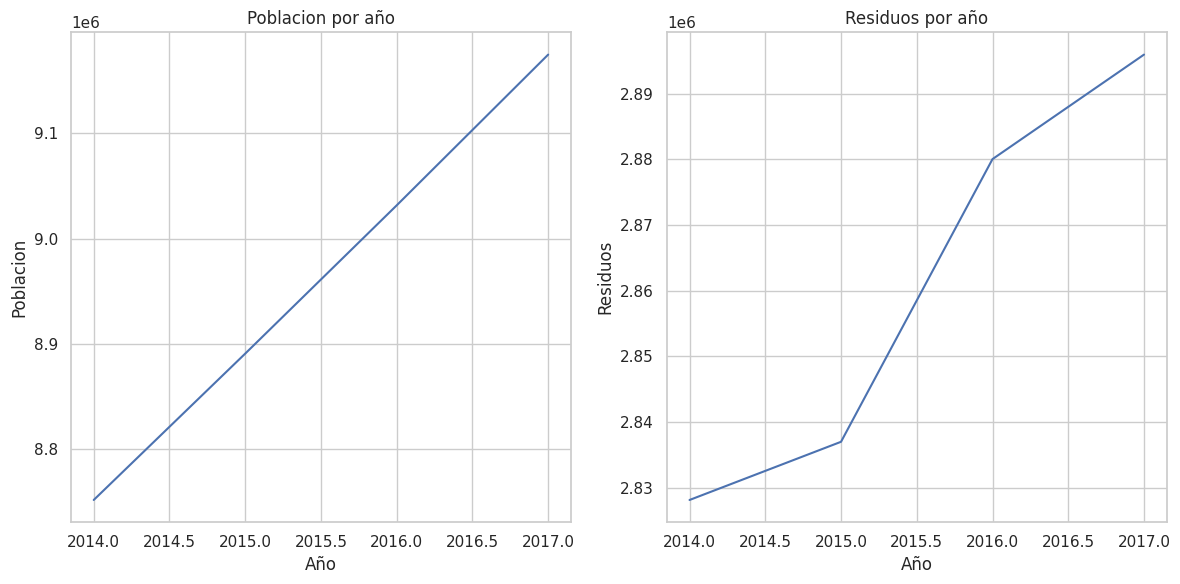

In [527]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.lineplot(x=tabla_año.index, y="Poblacion",data=tabla_año, ax=axs[0])
axs[0].set_title("Poblacion por año")
sns.lineplot(x=tabla_año.index, y="Residuos",data=tabla_año, ax=axs[1])
axs[1].set_title("Residuos por año")
plt.tight_layout()
plt.show()

In [530]:
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Poblacion por año", "Residuos por año"))
fig.add_trace(px.line(tabla_año, x=tabla_año.index, y="Poblacion").data[0], row=1, col=1)
fig.add_trace(px.line(tabla_año, x=tabla_año.index, y="Residuos").data[0], row=1, col=2)
fig.update_layout(height=600, width=800, title_text="Gráficos de Poblacion y Residuos por año")
fig.show()

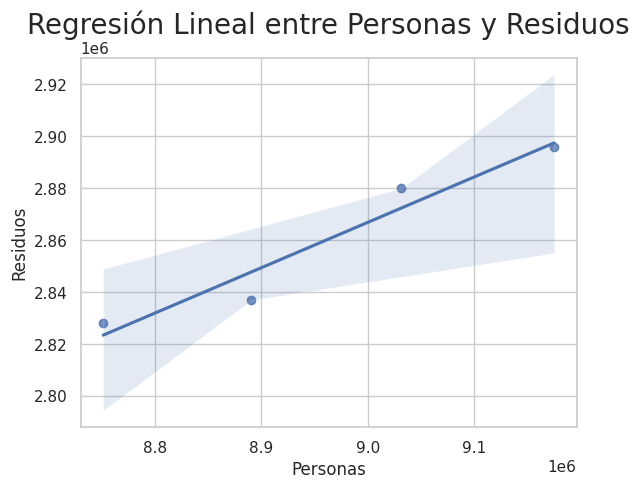

In [533]:
sns.regplot(data=tabla_año, x="Poblacion", y="Residuos")
plt.title("Regresión Lineal entre Personas y Residuos",fontsize=20)
plt.xlabel("Personas")
plt.ylabel("Residuos")
plt.show()

In [534]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
X = tabla_año["Poblacion"].values.reshape(-1, 1)
y = tabla_año["Residuos"].values.reshape(-1, 1)
regression_model.fit(X, y)
slope = regression_model.coef_[0][0]
intercept = regression_model.intercept_[0]
equation = f"Residuos = {slope:.2f} * Poblacion + {intercept:.2f}"
print("Ecuación de regresión lineal:")
print(equation)

Ecuación de regresión lineal:
Residuos = 0.17 * Poblacion + 1292840.98


**Conclusiones del grafico 3**

* Tal como se evindecia en las graficas la poblacion y los residuos se han incrementado al pasar los años.
* Asi mismo existe una correlacion entre estas dos variables, y se puede demostrar con el mapa de calor. En resumen si la poblacion aumenta los residuos tambien aumentan

Por ultimo la ecuacion de regresion lineal:
*  $text{Residuos} = 0.17 \times \text{Población} + 1292840.98$